# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kayla Argya Puruhita
- **Email:** kaayeelargya@gmail.com
- **ID Dicoding:** MC312D5X0469

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda per bulannya?
- Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?
- Pada jam berapa penyewaan sepeda mencapai puncaknya pada hari kerja dibandingkan akhir pekan?
- Bagaimana distribusi penyewaan sepeda dalam sehari?
- Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [111]:
# Memanggil Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [112]:
# Mengimpor Daily Dataset
daily_data = pd.read_csv("day.csv")
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [113]:
# Mengimpor Hourly Dataset
hourly_data = pd.read_csv("hour.csv")
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dua dataset di atas merupakan dataset peminjaman sepeda yang dibedakan menjadi daily dan dijabarkan lagi di tabel satunya menjadi hourly yang lebih detail.
- Keterangan setiap kolomnya adalah sebagai berikut.
 - instan: indeks record
 - dteday: tanggal
 - season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
 - yr: tahun (0: 2011, 1: 2012)
 - mnth: bulan (1 hingga 12)
 - hr jam (0 hingga 23)
 - holiday: hari libur yang diambil berdasarkan http://dchr.dc.gov/page/holiday-schedule (0: bukan holiday, 1: holiday)
 - weekday: hari dalam minggu
 - workingday: hari kerja (0: libur atau akhir pekan, 1: tidak libur atau akhir pekan)
 - weathersit:
   - 1: cerah, sedikit awan, sebagian berawan
   - 2: kabut + berawan, kabut + awan terputus, kabut + sedikit awan, kabut
   - 3: salju ringan, hujan ringan + badai + awan tersebar, hujan ringan + awan tersebar
   - 4: hujan deras + hujan es + badai petir + kabut, salju + kabut
 - temp: suhu yang dinormalisasi dalam Celsius (dibagi dengan suhu maksimum, yaitu 41)
 - atemp: suhu yang dirasakan yang dinormalisasi dalam Celsius (dibagi dengan suhu maksimum, yaitu 50)
 - hum: kelembapan yang dinormalisasi (dibagi dengan nilai maksimum, yaitu 100)
 - windspeed: kecepatan angin yang dinormalisasi (dibagi dengan nilai maksimum, yaitu 67)
 - casual: jumlah pengguna casual
 - registered: jumlah pengguna terdaftar
 - cnt: jumlah total pengguna (casual + registered)
- Pada kolom "temp", "atemp", "hum", dan "windspeed" angkanya sulit dimengerti karena ditampilkan dalam bentuk normalisasi.
- Nama-nama variabelnya masih sulit untuk dipahami dalam sekali lihat, oleh karena itu perlu diubah agar dipahami oleh orang umum.
- Variabel kategoriknya masih berupa angka, sehingga perlu membaca deskripsi untuk mengetahui makna dari masing-masing angka. Oleh karena itu, perlu dilakukan perubahan agar data terlihat lebih jelas.

### Assessing Data

**Pengecekan Tipe Data**

In [114]:
# Mengecek tipe data dari daily_data
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [115]:
# Mengecek tipe data dari hourly_data
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Pengecekan *Missing Value***

In [116]:
# Mengecek missing value dari daily_data
daily_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [117]:
# Mengecek missing value dari hourly_data
hourly_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Pengecekan Duplikasi Data**

In [118]:
# Mengecek duplikasi dari daily_data
print("Jumlah Duplikasi: ", daily_data.duplicated().sum())

Jumlah Duplikasi:  0


In [119]:
# Mengecek duplikasi dari hourly_data
print("Jumlah Duplikasi: ", hourly_data.duplicated().sum())

Jumlah Duplikasi:  0


**Pengecekan Parameter Statistik**

In [120]:
# Memeriksa parameter statistik dari daily_data
daily_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [121]:
# Memeriksa parameter statistik dari hourly_data
hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom "instant" tidak memberikan fungsi apapun karena hanyalah sebuah indeks/penomoran, oleh karena itu bisa dihapus saja.
- Data pada kolom "dteday" masih tergolong sebagai object (string) yang mana seharusnya merupakan datetime.
- Data pada kolom "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", dan "weathersit" masih tergolong sebagai integer, padahal datanya merupakan data kategorik.
- Baik dari daily_data dan hourly_data tidak ditemukan adanya missing value, duplikasi, maupun outlier, hanya saja beberapa hasil statistik deskriptifnya masih belum sesuai dikarenakan ada beberapa kolom yang tipe datanya masih belum sesuai.

### Cleaning Data

**Berdasarkan hasil Gathering Data dan Assessing Data, ada beberapa hal yang bisa dilakukan ketika Cleaning Data, yaitu sebagai berikut.**

**1. Menghapus Kolom yang Tidak Diperlukan**

In [122]:
# Menghapus kolom "instant" dari daily_data
daily_data.drop("instant", axis=1, inplace=True)

In [123]:
# Menghapus kolom "instant" dari hourly_data
hourly_data.drop("instant", axis=1, inplace=True)

**2. Mengubah Nama Kolom**

In [124]:
# Mengubah nama-nama kolom agar lebih mudah dipahami pada daily_data
daily_data = daily_data.rename(columns={"dteday": "Date", "season": "Season", "yr": "Year", "mnth": "Month", "holiday": "Holiday", "weekday": "Day_of_the_Week", "workingday": "Workday", "weathersit": "Weather_Condition", "temp": "Temperature",
"atemp": "Feels_Like_Temperature", "hum": "Humidity", "windspeed": "Windspeed", "casual": "Casual_Users", "registered": "Registered_Users", "cnt": "Total_Rentals"})

In [125]:
# Mengubah nama-nama kolom agar lebih mudah dipahami pada hourly_data
hourly_data = hourly_data.rename(columns={"dteday": "Date", "season": "Season", "yr": "Year", "mnth": "Month", "hr": "Hour", "holiday": "Holiday", "weekday": "Day_of_the_Week", "workingday": "Workday", "weathersit": "Weather_Condition", "temp": "Temperature",
"atemp": "Feels_Like_Temperature", "hum": "Humidity", "windspeed": "Windspeed", "casual": "Casual_Users", "registered": "Registered_Users", "cnt": "Total_Rentals"})

**3. Mengkonversi Isi Data**

In [126]:
# Konversi "Season" (1: Spring, 2: Summer, 3: Fall, dan 4: Winter)
daily_data["Season"] = daily_data["Season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
hourly_data["Season"] = hourly_data["Season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

In [127]:
# Konversi "Year" (0: 2011 dan 1: 2012)
daily_data["Year"] = daily_data["Year"].replace({0: "2011", 1: "2012"})
hourly_data["Year"] = hourly_data["Year"].replace({0: "2011", 1: "2012"})

In [128]:
# Konversi "Month" (1: Jan, 2: Feb, 3: Mar, 4: Apr, 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, dan 12: Dec)
daily_data["Month"] = daily_data["Month"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
hourly_data["Month"] = hourly_data["Month"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

In [129]:
# Konversi "Holiday" (0: No Holiday dan 1: Holiday)
daily_data["Holiday"] = daily_data["Holiday"].replace({0: "No", 1: "Yes"})
hourly_data["Holiday"] = hourly_data["Holiday"].replace({0: "No", 1: "Yes"})

In [130]:
# Konversi "Day_of_the_Week" ( 0: Sun, 1: Mon, 2: Tue, 3: Wed, 4: Thu, 5: Fri, dan 6: Sat)
daily_data["Day_of_the_Week"] = daily_data["Day_of_the_Week"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})
hourly_data["Day_of_the_Week"] = hourly_data["Day_of_the_Week"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

In [131]:
# Konversi "Workday" (0: No, 1: Yes)
daily_data["Workday"] = daily_data["Workday"].replace({0: "No", 1: "Yes"})
hourly_data["Workday"] = hourly_data["Workday"].replace({0: "No", 1: "Yes"})

In [132]:
# Konversi Weather_Condition (1: Clear, 2: Misty, 3: Light Snow/Rain, 4: Heavy Snow/Rain)
daily_data["Weather_Condition"] = daily_data["Weather_Condition"].replace({1: "Clear", 2: "Misty", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"})
hourly_data["Weather_Condition"] = hourly_data["Weather_Condition"].replace({1: "Clear", 2: "Misty", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"})

**Mengembalikan Nilai ke Nilai Sebelum Normalisasi**

In [133]:
# Mengembalikan nilai "Temperature" ke nilai sebelum normalisasi
daily_data["Temperature"] = daily_data["Temperature"] * 41
hourly_data["Temperature"] = hourly_data["Temperature"] * 41

In [134]:
# Mengembalikan nilai "Feels_Like_Temperature" ke nilai sebelum normalisasi
daily_data["Feels_Like_Temperature"] = daily_data["Feels_Like_Temperature"] * 50
hourly_data["Feels_Like_Temperature"] = hourly_data["Feels_Like_Temperature"] * 50

In [135]:
# Mengembalikan nilai "Humidity" ke nilai sebelum normalisasi
daily_data["Humidity"] = daily_data["Humidity"] * 100
hourly_data["Humidity"] = hourly_data["Humidity"] * 100

In [136]:
# Mengembalikan nilai "Windspeed" ke nilai sebelum normalisasi
daily_data["Windspeed"] = daily_data["Windspeed"] * 67
hourly_data["Windspeed"] = hourly_data["Windspeed"] * 67

**4. Mengubah Tipe Data**

In [137]:
# Mengubah tipe data object menjadi datetime pada kolom "Date"
daily_data["Date"] = pd.to_datetime(daily_data["Date"])
hourly_data["Date"] = pd.to_datetime(hourly_data["Date"])

In [138]:
# Mengubah tipe data int menjadi category pada kolom "Seaason"
daily_data["Season"] = daily_data["Season"].astype("category")
hourly_data["Season"] = hourly_data["Season"].astype("category")

In [139]:
# Mengubah tipe data int menjadi category pada kolom "Year"
daily_data["Year"] = daily_data["Year"].astype("category")
hourly_data["Year"] = hourly_data["Year"].astype("category")

In [140]:
# Mengubah tipe data int menjadi category pada kolom "Month"
daily_data["Month"] = daily_data["Month"].astype("category")
hourly_data["Month"] = hourly_data["Month"].astype("category")

In [141]:
# Mengubah tipe data int menjadi category pada kolom "Hour"
hourly_data["Hour"] = hourly_data["Hour"].astype("category")

In [142]:
# Mengubah tipe data int menjadi category pada kolom "Holiday"
daily_data["Holiday"] = daily_data["Holiday"].astype("category")
hourly_data["Holiday"] = hourly_data["Holiday"].astype("category")

In [143]:
# Mengubah tipe data int menjadi category pada kolom "Day_of_the_Week"
daily_data["Day_of_the_Week"] = daily_data["Day_of_the_Week"].astype("category")
hourly_data["Day_of_the_Week"] = hourly_data["Day_of_the_Week"].astype("category")

In [144]:
# Mengubah tipe data int menjadi category pada kolom "Workday"
daily_data["Workday"] = daily_data["Workday"].astype("category")
hourly_data["Workday"] = hourly_data["Workday"].astype("category")

In [145]:
# Mengubah tipe data int menjadi category pada kolom "Weather_Condition"
daily_data["Weather_Condition"] = daily_data["Weather_Condition"].astype("category")
hourly_data["Weather_Condition"] = hourly_data["Weather_Condition"].astype("category")

**5. Menambah Kolom "Times_of_the_Day" untuk Menggolongkan Morning, Afternoon, Late Afternoon, dan Night**

Bagian ini merupakan tambahan yang berguna untuk visualisasi data nantinya.

In [146]:
# Menentukan kondisi tiap periode waktu
conditions = [
    (hourly_data["Hour"].isin([3, 4, 5, 6, 7, 8, 9, 10])),
    (hourly_data["Hour"].isin([11, 12, 13, 14, 15])),
    (hourly_data["Hour"].isin([16, 17, 18])),
    (hourly_data["Hour"].isin([17, 18, 19, 20, 21, 22, 23, 0, 1, 2]))
]

# Periode waktu berdasarkan nilai
values = ["Morning", "Afternoon", "Late Afternoon", "Night"]

# Membuat kolom
hourly_data["Times_of_the_Day"] = np.select(conditions, values, default="Unknown")

# Menetapkan tipe data sebagai category
hourly_data["Times_of_the_Day"] = hourly_data["Times_of_the_Day"].astype("category")

**6. Pengecekan Data Setelah Perubahan**

In [147]:
# Mengecek daily_data terbaru
daily_data.head()

,Date,Season,Year,Month,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [148]:
# Mengecek hourly_data terbaru
hourly_data.head()

,Date,Season,Year,Month,Hour,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals,Times_of_the_Day
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,9.84,14.395,81.0,0.0,3,13,16,Night
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,9.02,13.635,80.0,0.0,8,32,40,Night
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,9.02,13.635,80.0,0.0,5,27,32,Night
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,9.84,14.395,75.0,0.0,3,10,13,Morning
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,9.84,14.395,75.0,0.0,0,1,1,Morning


In [149]:
# Mengecek tipe data terbaru dari daily_data
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    731 non-null    datetime64[ns]
 1   Season                  731 non-null    category      
 2   Year                    731 non-null    category      
 3   Month                   731 non-null    category      
 4   Holiday                 731 non-null    category      
 5   Day_of_the_Week         731 non-null    category      
 6   Workday                 731 non-null    category      
 7   Weather_Condition       731 non-null    category      
 8   Temperature             731 non-null    float64       
 9   Feels_Like_Temperature  731 non-null    float64       
 10  Humidity                731 non-null    float64       
 11  Windspeed               731 non-null    float64       
 12  Casual_Users            731 non-null    int64     

In [150]:
# Mengecek tipe data terbaru dari hourly_data
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    17379 non-null  datetime64[ns]
 1   Season                  17379 non-null  category      
 2   Year                    17379 non-null  category      
 3   Month                   17379 non-null  category      
 4   Hour                    17379 non-null  category      
 5   Holiday                 17379 non-null  category      
 6   Day_of_the_Week         17379 non-null  category      
 7   Workday                 17379 non-null  category      
 8   Weather_Condition       17379 non-null  category      
 9   Temperature             17379 non-null  float64       
 10  Feels_Like_Temperature  17379 non-null  float64       
 11  Humidity                17379 non-null  float64       
 12  Windspeed               17379 non-null  float6

In [151]:
# Mengecek parameter statistik terbaru dari daily_data
daily_data.describe(include="all")

,Date,Season,Year,Month,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Aug,No,Mon,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [152]:
# Mengecek parameter statistik terbaru dari hourly_data
hourly_data.describe(include="all")

,Date,Season,Year,Month,Hour,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals,Times_of_the_Day
count,17379,17379,17379,17379,17379.0,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,24.0,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,Fall,2012,Jul,17.0,No,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night
freq,NaN,4496,8734,1488,730.0,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5805
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


**Insight:**

Berdasarkan insights dari Data Wrangling dan Data Assessing, sudah dilakukan pembersihan data (Data Cleaning). Berikut merupakan kesimpulannya.
- Kolom "instant" sudah dihapus.
- Nama-nama variabel yang masih sulit untuk dipahami sudah diubah.
- Variabel kategorik yang awalnya masih dikategorikan sebagai angka sudah didefinisikan lebih jelas.
- Nilai pada kolom "Temperature", "Feels_Like_Temperature", "Humidity", dan "Windspeed" sudah dikembalikan ke bentuk sebelum normalisasi.
- Tipe data pada kolom "Date" sudah diubah menjadi datetime.
- Tipe data pada kolom "Season", "Year", "Month", "Hour", "Holiday", "Day_of_the_Week", "Workday", dan "Weather_Condition" sudah diubah menjadi kategorik.

Selain itu, ditambahkan juga kolom "Times_of_the_Day" pada hourly_data untuk menggolongkan Morning, Afternoon, Late Afternoon, dan Night yang nantinya akan berguna untuk visualisasi data.

## Exploratory Data Analysis (EDA)

### Explore daily_data

In [153]:
# Melihat daily_data
daily_data

,Date,Season,Year,Month,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Spring,2012,Dec,No,Thu,Yes,Misty,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,2012-12-28,Spring,2012,Dec,No,Fri,Yes,Misty,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,2012-12-29,Spring,2012,Dec,No,Sat,No,Misty,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,2012-12-30,Spring,2012,Dec,No,Sun,No,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Memulai dari yang paling dasar, kita bisa saja membuat tabel yang hanya berisi data rental harian dari casual users dan registered users.

In [154]:
# Membuat tabel berisi "Date", "Casual_Users", dan "Registered_Users"
rentals_data = daily_data[["Date", "Casual_Users", "Registered_Users"]]
rentals_data

,Date,Casual_Users,Registered_Users
0,2011-01-01,331,654
1,2011-01-02,131,670
2,2011-01-03,120,1229
3,2011-01-04,108,1454
4,2011-01-05,82,1518
...,...,...,...
726,2012-12-27,247,1867
727,2012-12-28,644,2451
728,2012-12-29,159,1182
729,2012-12-30,364,1432


In [155]:
# Mengecek parameter statistik dari rentals_data
rentals_data.describe()

,Date,Casual_Users,Registered_Users
count,731,731.000000,731.000000
mean,2012-01-01 00:00:00,848.176471,3656.172367
min,2011-01-01 00:00:00,2.000000,20.000000
25%,2011-07-02 12:00:00,315.500000,2497.000000
50%,2012-01-01 00:00:00,713.000000,3662.000000
75%,2012-07-01 12:00:00,1096.000000,4776.500000
max,2012-12-31 00:00:00,3410.000000,6946.000000
std,NaN,686.622488,1560.256377


Ketika dicek, dapat terlihat bahwa **peminjaman** sepeda **lebih banyak** dilakukan oleh **registered users**. Hal ini terlihat dari nilai rata-rata yang lebih tinggi, yaitu sekitar 3656 sepeda per hari, dibandingkan dengan casual users yang rata-ratanya sekitar 848 sepeda per hari. Selain itu, nilai minimum dan maksimum registered users lebih besar jika dibandingkan dengan nilai minimum dan maksimum casual users.

Selanjutnya, mari kita coba untuk melihat banyak penyewaan sepeda tiap bulannya.

In [156]:
monthly_rentals = daily_data.groupby(by=["Month", "Year"]).agg({"Total_Rentals": "sum"}).unstack(fill_value=0)
monthly_rentals

<ipython-input-156-ab407342ac4c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = daily_data.groupby(by=["Month", "Year"]).agg({"Total_Rentals": "sum"}).unstack(fill_value=0)


Total_Rentals        
Year           2011    2012
Month                      
Apr           94870  174224
Aug          136691  214503
Dec           87323  123713
Feb           48215  103137
Jan           38189   96744
Jul          141341  203607
Jun          143512  202830
Mar           64045  164875
May          135821  195865
Nov          102167  152664
Oct          123511  198841
Sep          127418  218573

Setelah dibuat tabel, ternyata nama bulan pada kolom "Month" belum terurut sesuai urutan bulan, oleh karena itu perlu dilakukan penyesuaian terlebih dahulu.

In [157]:
# Mengubah kolom "Month" menjadi kategori dengan urutan yang benar
monthly_rentals.index = pd.Categorical(monthly_rentals.index, categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)

# Menyortir data berdasarkan bulan
monthly_rentals = monthly_rentals.sort_index()

monthly_rentals

Total_Rentals        
Year          2011    2012
Jan          38189   96744
Feb          48215  103137
Mar          64045  164875
Apr          94870  174224
May         135821  195865
Jun         143512  202830
Jul         141341  203607
Aug         136691  214503
Sep         127418  218573
Oct         123511  198841
Nov         102167  152664
Dec          87323  123713

Setelah data diurutkan, data menjadi lebih mudah dipahami. Selain itu, dapat terlihat bahwa pada tahun 2012, semua bulan mengalami kenaikan jika dibandingkan dengan tahun 2011.

**Insight:**
- Peminjaman sepeda lebih banyak dilakukan oleh registered users.
- Pada tahun 2012, jika dibandingkan dengan 2011, terjadi kenaikan jumlah penyewaan.

### Explore hourly_data

In [158]:
# Melihat hourly_data
hourly_data

,Date,Season,Year,Month,Hour,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals,Times_of_the_Day
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,Night
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,Night
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,Night
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,Morning
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,Dec,19,No,Mon,Yes,Misty,10.66,12.880,60.0,11.0014,11,108,119,Night
17375,2012-12-31,Spring,2012,Dec,20,No,Mon,Yes,Misty,10.66,12.880,60.0,11.0014,8,81,89,Night
17376,2012-12-31,Spring,2012,Dec,21,No,Mon,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,Night
17377,2012-12-31,Spring,2012,Dec,22,No,Mon,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,Night


Berdasarkan hourly_data, kita bisa mencoba untuk **membandingkan penyewaan** sepeda pada **hari kerja dengan akhir pekan**. Namun, sebelum itu perlu dibuat kolom baru yang membedakan Weekday dan Weekend.

In [159]:
# Membuat kolom day_type untuk membedakan weekday dan weekend
def classify_day(Day_of_the_Week):
    if Day_of_the_Week in ["Sat", "Sun"]:
        return "Weekend"
    else:
        return "Weekday"

hourly_data["day_type"] = hourly_data["Day_of_the_Week"].apply(classify_day)

hourly_data["day_type"] = hourly_data["day_type"].astype("category")

hourly_data

,Date,Season,Year,Month,Hour,Holiday,Day_of_the_Week,Workday,Weather_Condition,Temperature,Feels_Like_Temperature,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Rentals,Times_of_the_Day,day_type
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,Night,Weekend
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,Night,Weekend
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,Night,Weekend
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,Morning,Weekend
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,Morning,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,Dec,19,No,Mon,Yes,Misty,10.66,12.880,60.0,11.0014,11,108,119,Night,Weekday
17375,2012-12-31,Spring,2012,Dec,20,No,Mon,Yes,Misty,10.66,12.880,60.0,11.0014,8,81,89,Night,Weekday
17376,2012-12-31,Spring,2012,Dec,21,No,Mon,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,Night,Weekday
17377,2012-12-31,Spring,2012,Dec,22,No,Mon,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,Night,Weekday


In [160]:
# Tabel perbedaan penyewaan sepeda
rentals_by_day_type = hourly_data.groupby(by=["Hour", "day_type"]).agg({"Total_Rentals": "mean"}).unstack(fill_value=0)
rentals_by_day_type

<ipython-input-160-d81bf15307ea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_by_day_type = hourly_data.groupby(by=["Hour", "day_type"]).agg({"Total_Rentals": "mean"}).unstack(fill_value=0)


Total_Rentals            
day_type       Weekday     Weekend
Hour                              
0            37.626692   94.148325
1            17.464078   72.583732
2             9.377953   55.980676
3             5.188525   26.995215
4             5.446939    8.497585
5            24.331395    8.487562
6            99.485493   17.778846
7           282.145068   39.533333
8           464.557060   99.166667
9           238.661509  171.666667
10          138.133462  261.152381
11          161.897485  321.995238
12          204.320463  374.171429
13          202.479769  380.152381
14          187.728324  372.480952
15          203.913295  368.180952
16          292.280769  360.771429
17          515.915385  326.590476
18          483.184971  282.291866
19          343.277457  232.669856
20          246.815029  174.416268
21          184.620424  141.755981
22          137.194605  116.784689
23           87.462428   88.746411

Dari tabel tersebut dapat terlihat bahwa **ada jam-jam tertentu dimana peminjaman ketika weekday cenderung lebih banyak dibandingkan dengan weekend**, begitu pula sebaliknya. Contohnya, pada jam 00:00, 01:00, 02:00, dst penyewaan sepeda cenderung lebih banyak terjadi pada weekend dibandingkan dengan weekday. Sedangkan pada jam 05:00, 06:00, 07:00, dll penyewaan lebih banyak terjadi di weekdays dibandingkan dengan weekend.

Selain itu, berdasarkan kolom **Times_of_the_Day** yang dibuat pada tahap  Data Cleaning, kita bisa mencoba gunakan untuk melihat **distribusi penyewaan sepeda dalam sehari** yang digolongkan menjadi pagi (morning), siang (afternoon), sore (late afternoon), dan malam (night).

In [161]:
daily_rentals = hourly_data.groupby("Times_of_the_Day").agg({"Total_Rentals": "mean"})
daily_rentals

<ipython-input-161-4301f4868a08>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_rentals = hourly_data.groupby("Times_of_the_Day").agg({"Total_Rentals": "mean"})


,Total_Rentals
Times_of_the_Day,
Afternoon,241.475563
Late Afternoon,399.625229
Morning,136.292131
Night,130.229630


Berdasarkan tabel di atas, dapat disimpulkan bahwa **rata-rata** orang cenderung menyewa sepeda pada waktu **sore hari** (pukul 16:00 - 18:00) dibandingkan dengan pagi, siang, ataupun malam hari.

**Insight:**
- Pada jam-jam tertentu, peminjaman ketika weekday cenderung lebih banyak dibandingkan dengan weekend, begitu pula sebaliknya.
- Rata-rata, orang menyewa sepeda ketika sore hari (di antara pukul 16:00 - 18:00)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda per bulannya?

<ipython-input-162-3aacd78ebf15>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rentals_2011.index, y=monthly_rentals_2011, palette=colors_2011, ax=ax[0])
<ipython-input-162-3aacd78ebf15>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rentals_2012.index, y=monthly_rentals_2012, palette=colors_2012, ax=ax[1])


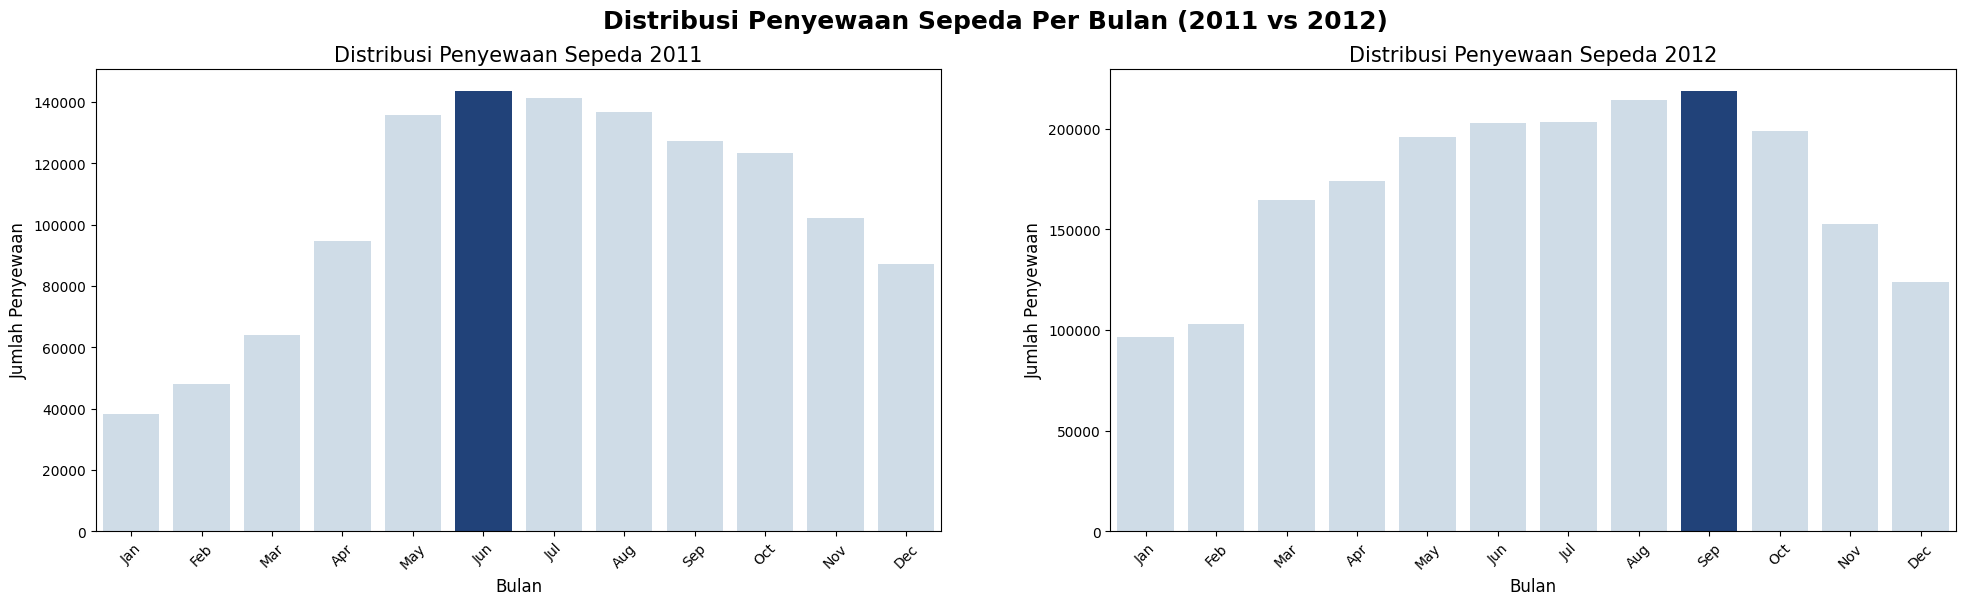

In [162]:
# Menyiapkan data 2011 dan 2012
monthly_rentals_2011 = monthly_rentals["Total_Rentals"]["2011"]
monthly_rentals_2012 = monthly_rentals["Total_Rentals"]["2012"]

# Menemukan bulan dengan jumlah penyewaan tertinggi
max_month_2011 = monthly_rentals_2011.idxmax()
max_month_2012 = monthly_rentals_2012.idxmax()

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk bar chart (warna biru untuk bar tertinggi)
colors_2011 = ["#CBDCEB" if month != max_month_2011 else "#133E87" for month in monthly_rentals_2011.index]
colors_2012 = ["#CBDCEB" if month != max_month_2012 else "#133E87" for month in monthly_rentals_2012.index]

# Bar chart 2011
sns.barplot(x=monthly_rentals_2011.index, y=monthly_rentals_2011, palette=colors_2011, ax=ax[0])
ax[0].set_title("Distribusi Penyewaan Sepeda 2011", fontsize=15)
ax[0].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[0].set_xlabel("Bulan", fontsize=12)
ax[0].tick_params(axis="x", labelrotation=45, labelsize=10)

# Bar chart 2012
sns.barplot(x=monthly_rentals_2012.index, y=monthly_rentals_2012, palette=colors_2012, ax=ax[1])
ax[1].set_title("Distribusi Penyewaan Sepeda 2012", fontsize=15)
ax[1].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[1].set_xlabel("Bulan", fontsize=12)
ax[1].tick_params(axis="x", labelrotation=45, labelsize=10)

# Menambahkan judul utama
plt.suptitle("Distribusi Penyewaan Sepeda Per Bulan (2011 vs 2012)", fontsize=18, fontweight="bold")

# Menampilkan plot
plt.show()

**Insight:**
Pada 2011, puncak penyewaan sepeda terjadi pada bulan Juni, dengan jumlah penyewaan tertinggi dibandingkan bulan lainnya. Sedangkan pada 2012, puncak penyewaan sepeda terjadi pada bulan September, yang menunjukkan perbedaan pola distribusi dibandingkan dengan tahun sebelumnya.


### Pertanyaan 2: Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?

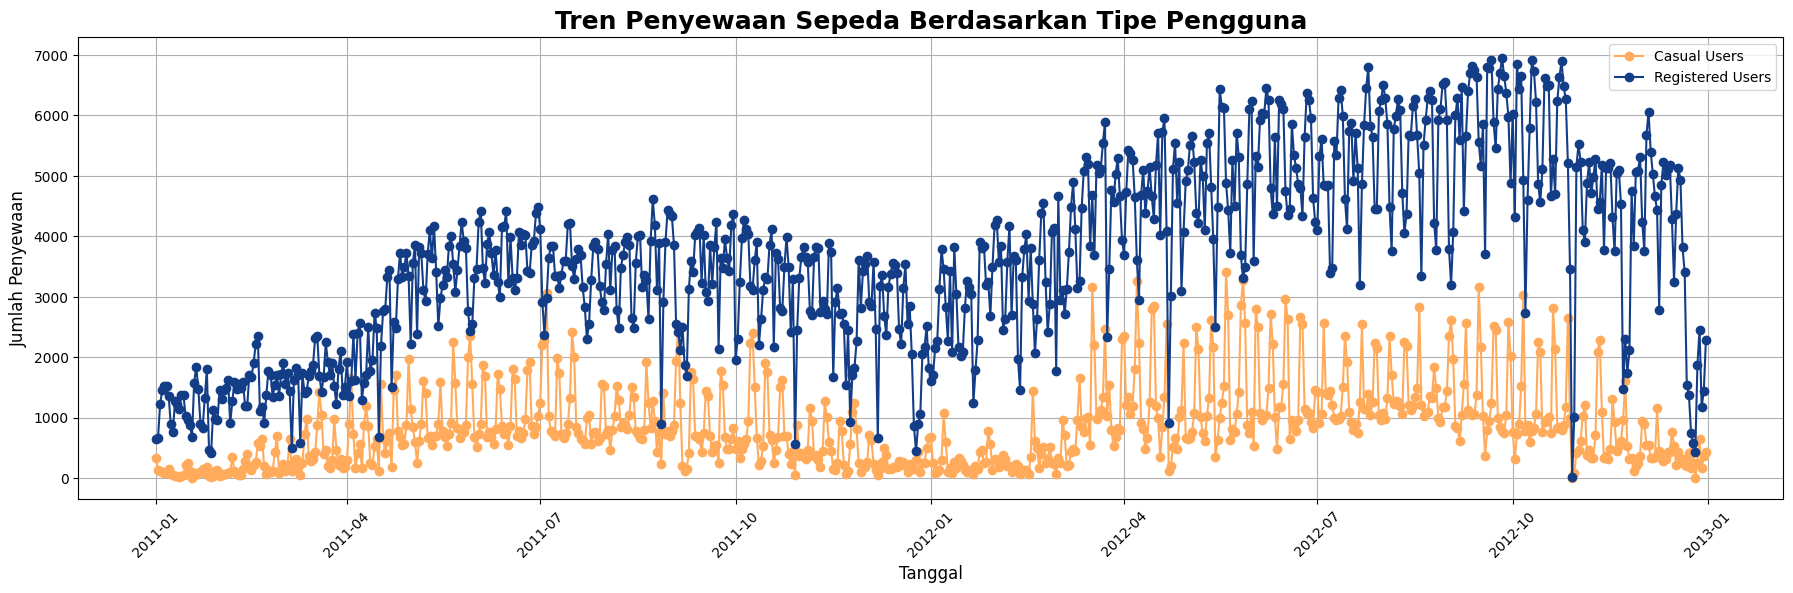

In [163]:
# Membuat plot
plt.figure(figsize=(22, 6))

# Plot data Casual Users
plt.plot(rentals_data["Date"], rentals_data["Casual_Users"], label="Casual Users", marker="o", color="#FFAB5B")

# Plot data Registered Users
plt.plot(rentals_data["Date"], rentals_data["Registered_Users"], label="Registered Users", marker="o", color="#133E87")

# Menambahkan label dan judul
plt.title("Tren Penyewaan Sepeda Berdasarkan Tipe Pengguna", fontsize=18, fontweight="bold", loc="center")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

**Insight:**
- Grafik menunjukkan bahwa Registered Users (Pengguna Terdaftar) selalu memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan Casual Users (Pengguna Kasual) pada hampir semua waktu. Ini mengindikasikan bahwa pengguna yang terdaftar lebih sering menyewa sepeda dan mungkin lebih loyal dalam menggunakan layanan sepeda dibandingkan dengan pengguna kasual.
- Tren penyewaan sepeda lebih stabil untuk pengguna terdaftar yang cenderung menggunakan sepeda secara konsisten, sementara untuk pengguna kasual, tren penyewaan lebih fluktuatif.

### Pertanyaan 3: Pada jam berapa penyewaan sepeda mencapai puncaknya pada hari kerja dibandingkan akhir pekan?

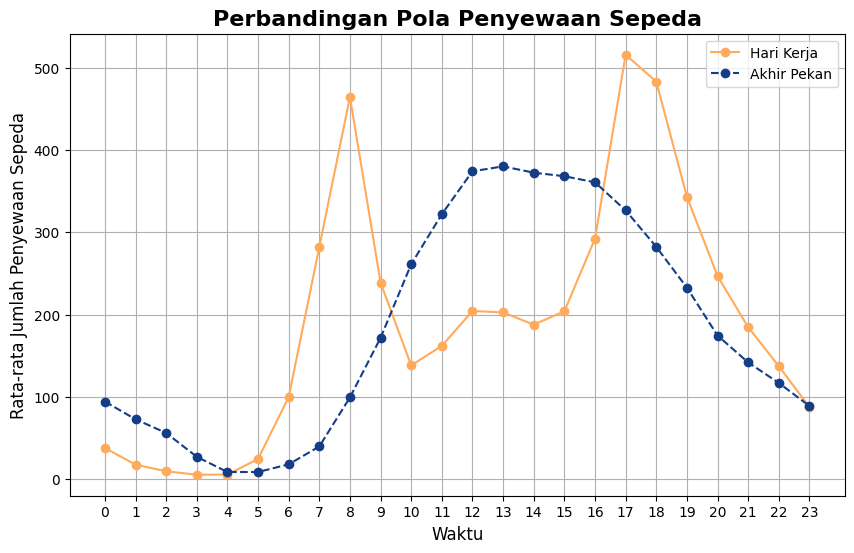

In [164]:
# Membuat plot
plt.figure(figsize=(10, 6))

# Plot data Weekday
plt.plot(rentals_by_day_type.index, rentals_by_day_type["Total_Rentals"]["Weekday"], label="Hari Kerja", marker="o", linestyle="-", color="#FFAB5B")

# Plot data Weekend
plt.plot(rentals_by_day_type.index, rentals_by_day_type["Total_Rentals"]["Weekend"], label="Akhir Pekan", marker="o", linestyle="--", color="#133E87")

# Menambahkan label dan judul
plt.title("Perbandingan Pola Penyewaan Sepeda", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("Waktu", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(rentals_by_day_type.index, fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

**Insight:**
- Pada hari kerja, puncak penyewaan sepeda terjadi di pagi hari pada pukul 08:00 dan sore hari pada pukul 17:00, yang kemungkinan besar berhubungan dengan jam kerja ataupun aktivitas rutin.
- Pada akhir pekan, polanya cenderung lebih rata, menunjukkan bahwa ada kemungkinan bahwa orang lebih fleksibel dalam memilih waktu untuk beraktivitas menggunakan sepeda. Jadi, walaupun peminjaman tertinggi pada akhir pekan ada di pukul 13:00, namun dari pukul 12:00 - 16:00 peminjamannya relatif tinggi dan stabil.


### Pertanyaan 4: Bagaimana distribusi penyewaan sepeda dalam sehari (pagi, siang, sore, malam)?

<ipython-input-165-b9869c54e0a5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_rentals["Times_of_the_Day"], y=daily_rentals["Total_Rentals"], palette=colors)


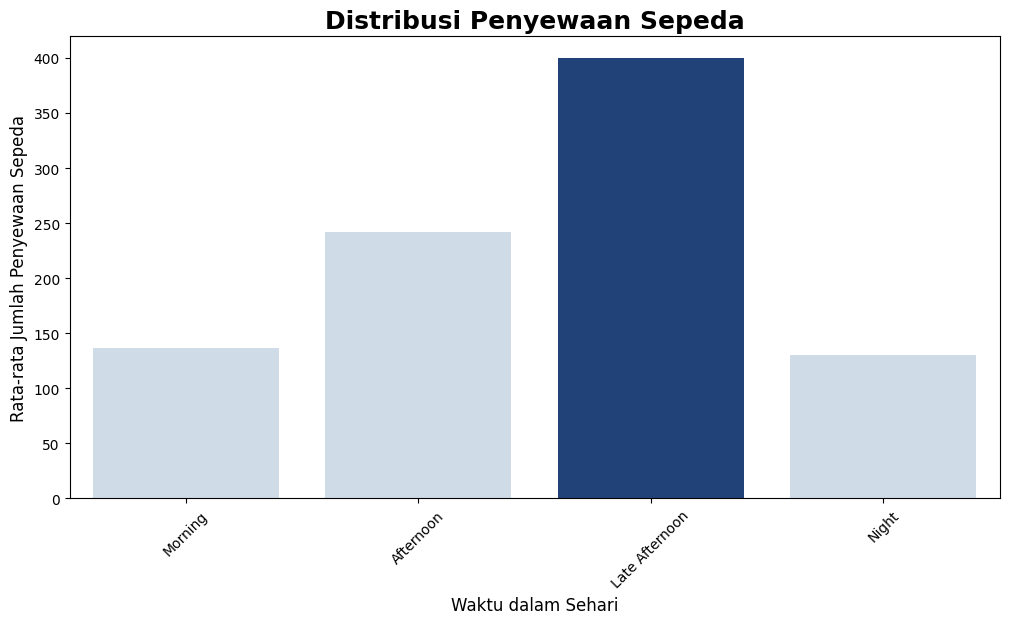

In [165]:
# Mengubah kolom "Times_of_the_Day" menjadi kategori dengan urutan yang benar
daily_rentals["Times_of_the_Day"] = pd.Categorical(daily_rentals.index,
                                                   categories=["Morning", "Afternoon", "Late Afternoon", "Night"],
                                                   ordered=True)

# Membuat plot
plt.figure(figsize=(12, 6))

# Warna untuk bar chart
colors = ["#CBDCEB", "#CBDCEB", "#133E87", "#CBDCEB"]

# Membuat bar chart
sns.barplot(x=daily_rentals["Times_of_the_Day"], y=daily_rentals["Total_Rentals"], palette=colors)

# Menambahkan label dan judul
plt.title("Distribusi Penyewaan Sepeda", loc="center", fontsize=18, fontweight="bold")
plt.xlabel("Waktu dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)

# Menyesuaikan ukuran label
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.show()


**Insight:**

Penyewaan sepeda paling banyak terjadi pada sore hari (Late Afternoon), yang menunjukkan banyak orang beraktivitas atau bersepeda setelah jam kerja atau sekolah, sedangkan penyewaan sepeda di pagi dan malam hari lebih rendah, menunjukkan aktivitas bersepeda pada waktu tersebut lebih terbatas.

### Pertanyaan 5: Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?

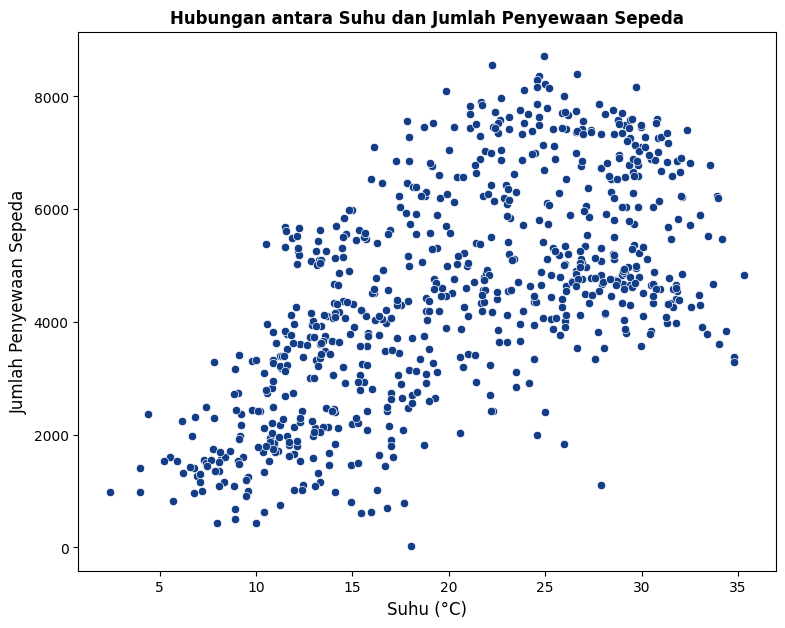

In [166]:
plt.figure(figsize=(9, 7))

# Membuat scatter plot untuk suhu (temp) dan jumlah penyewaan sepeda
sns.scatterplot(x=daily_data["Temperature"], y=daily_data["Total_Rentals"], color="#133E87")

# Menampilkan plot
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda", fontsize=12, fontweight="bold")
plt.xlabel("Suhu (°C)", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.show()

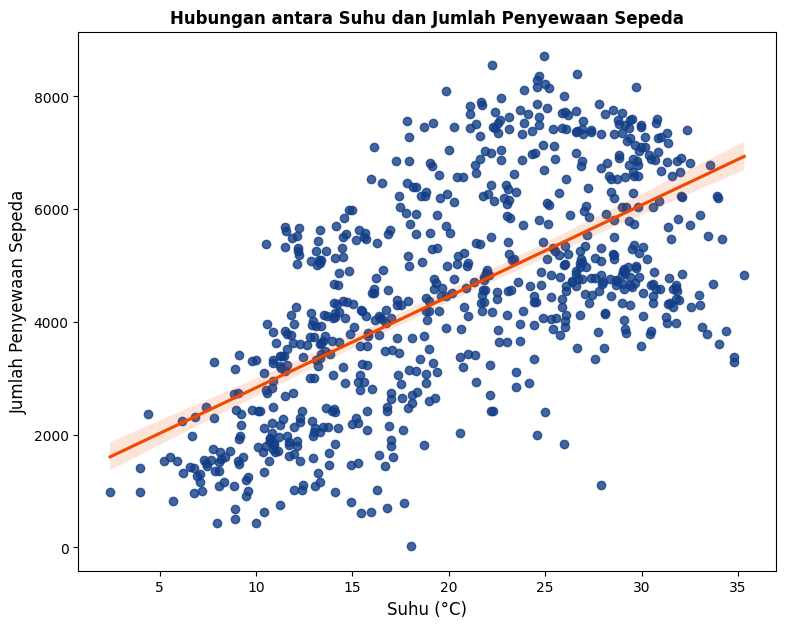

In [167]:
plt.figure(figsize=(9, 7))

# Membuat regresi plot untuk suhu (temp) dan jumlah penyewaan sepeda
sns.regplot(x=daily_data["Temperature"], y=daily_data["Total_Rentals"], scatter_kws={"color": "#133E87"}, line_kws={"color": "#F14A00"})

# Menampilkan plot
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda", fontsize=12, fontweight="bold")
plt.xlabel("Suhu (°C)", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.show()

**Insight:**

Secara keseluruhan, grafik ini menunjukkan bahwa suhu memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda, dengan jumlah penyewaan cenderung lebih tinggi pada suhu yang lebih tinggi, meskipun masih ada variabilitas yang mungkin disebabkan oleh faktor lain.

## Analisis Lanjutan (Clustering)

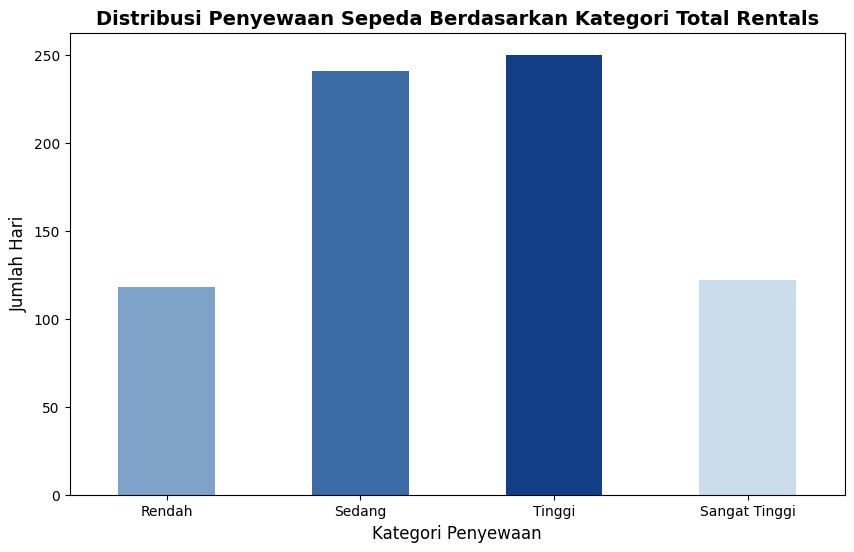

In [168]:
# Menentukan bin untuk Total Rentals
bins = [0, 2250, 4500, 6750, 9000]  # Rentang penyewaan sepeda
labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Menambahkan kolom "rental_category" berdasarkan Total Rentals
daily_data["rental_category"] = pd.cut(daily_data["Total_Rentals"], bins=bins, labels=labels, right=False)

# Daftar warna sesuai kategori
colors = ["#7FA3C8", "#3B6BA5", "#133E87", "#CBDCEB"]

# Visualisasi distribusi dengan bar chart
plt.figure(figsize=(10, 6))
daily_data["rental_category"].value_counts().sort_index().plot(kind="bar", color=colors)

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kategori Total Rentals", fontsize=14, fontweight="bold")
plt.xlabel("Kategori Penyewaan", fontsize=12)
plt.ylabel("Jumlah Hari", fontsize=12)
plt.xticks(rotation=0)
plt.show()

Berdasarkan visualisasi distribusi penyewaan sepeda, sebagian besar hari berada pada kategori "High" dan "Medium", menunjukkan bahwa penyewaan sepeda lebih sering terjadi dalam jumlah menengah hingga tinggi. Sementara itu, kategori "Low" dan "Very High" memiliki jumlah hari yang lebih sedikit, dengan "Low" mencatatkan penyewaan paling sedikit dan "Very High" lebih jarang terjadi.

## Conclusion

1. Bagaimana distribusi penyewaan sepeda tiap bulannya?
  
  > Pada 2011, puncak penyewaan sepeda terjadi pada bulan Juni, dengan jumlah penyewaan tertinggi dibandingkan bulan lainnya. Sedangkan pada 2012, puncak penyewaan sepeda terjadi pada bulan September, yang menunjukkan perbedaan pola distribusi dibandingkan dengan tahun sebelumnya.

2. Bagaimana tren penyewaan sepeda yang ada?

  > Grafik menunjukkan bahwa Registered Users (Pengguna Terdaftar) selalu memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan Casual Users (Pengguna Kasual) pada hampir semua waktu, yang mengindikasikan bahwa pengguna terdaftar lebih sering menyewa sepeda dan mungkin lebih loyal dalam menggunakan layanan sepeda. Selain itu, tren penyewaan sepeda lebih stabil untuk pengguna terdaftar yang cenderung menggunakan sepeda secara konsisten, sementara untuk pengguna kasual, tren penyewaan lebih fluktuatif.

3. Pada jam berapa penyewaan sepeda mencapai puncaknya pada hari kerja dibandingkan akhir pekan?

  > Pada hari kerja, puncak penyewaan sepeda terjadi pada pukul 08:00 di pagi hari dan pukul 17:00 di sore hari, kemungkinan besar terkait dengan jam kerja atau aktivitas rutin. Sementara itu, pada akhir pekan, pola penyewaan lebih merata, menunjukkan bahwa orang cenderung lebih fleksibel dalam memilih waktu bersepeda. Meskipun peminjaman tertinggi terjadi pada pukul 13:00, penyewaan tetap relatif tinggi dan stabil antara pukul 12:00 hingga 16:00.

4. Bagaimana distribusi penyewaan sepeda dalam sehari?

  > Penyewaan sepeda paling banyak terjadi pada sore hari (Late Afternoon), yang menunjukkan banyak orang beraktivitas atau bersepeda setelah jam kerja atau sekolah, sedangkan penyewaan sepeda di pagi dan malam hari lebih rendah, menunjukkan aktivitas bersepeda pada waktu tersebut lebih terbatas.

5. Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?

  > Suhu memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda, dengan jumlah penyewaan cenderung lebih tinggi pada suhu yang lebih tinggi, meskipun masih ada variabilitas yang mungkin disebabkan oleh faktor lain.

In [169]:
daily_data.to_csv("daily_clean.csv", index=False)
hourly_data.to_csv("hourly_clean.csv", index=False)